<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-March/blob/main/DBSCAN/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

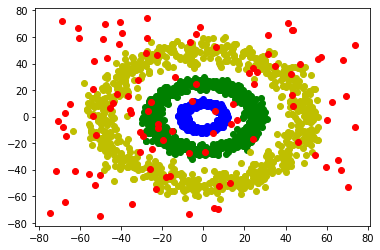

In [2]:
def circle():
    X, y = make_circles(noise = 0.1, factor = 0.3, n_samples = 1500)
    X = X[ y==0]
    y = y[y==0]
    return X, y

X1, y1 = circle()
X2, y2 = circle()
X3, y3 = circle()
n1 = np.random.rand(100, 2)*150 - 75
# n2 = np.random.rand(100)*150 - 75

X1 *= 10
X2 *= 25
X3 *= 50

plt.scatter(X1[:, 0], X1[:, 1], color = 'b')
plt.scatter(X2[:, 0], X2[:, 1], color = 'g')
plt.scatter(X3[:, 0], X3[:, 1], color = 'y')
plt.scatter(n1[:, 0], n1[:, 1], color = 'r')

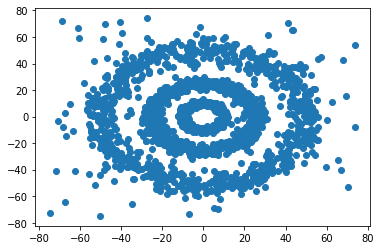

In [3]:
X = np.vstack([X1, X2, X3, n1])
plt.scatter(X[:, 0], X[:, 1])

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(X)

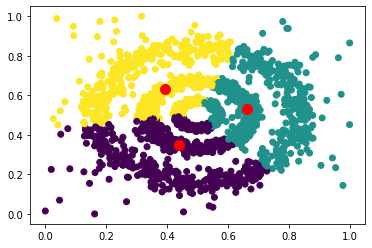

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

km.fit(scaled)
y_pred = km.predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c = 'red', s = 100)
plt.show()

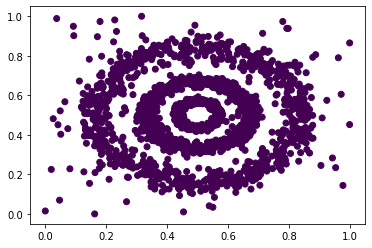

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
np.unique(y_pred)

array([0])

# Find Best eps

In [17]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors= 5)
nn.fit(scaled)

NearestNeighbors()

In [18]:
distance, index = nn.kneighbors(scaled)

In [19]:
distance

array([[0.        , 0.00192318, 0.00262523, 0.00276072, 0.0035204 ],
       [0.        , 0.00083927, 0.00262182, 0.00484399, 0.00665224],
       [0.        , 0.00268562, 0.00318564, 0.00384035, 0.00463966],
       ...,
       [0.        , 0.07202323, 0.13009268, 0.13464858, 0.15793767],
       [0.        , 0.01213819, 0.0150573 , 0.01718358, 0.01768445],
       [0.        , 0.00033342, 0.00269162, 0.00531741, 0.00697044]])

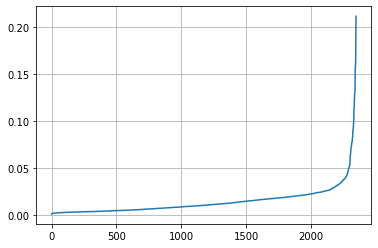

In [21]:
dist = distance[:, 4]
dist.sort()
plt.grid()
plt.plot(dist)

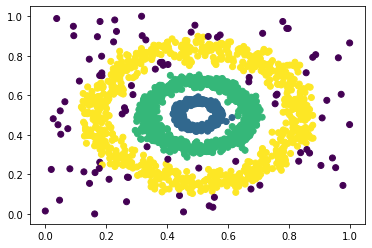

In [32]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.031, min_samples=5, metric='euclidean')

y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)

In [33]:
np.unique(y_pred)

array([-1,  0,  1,  2])

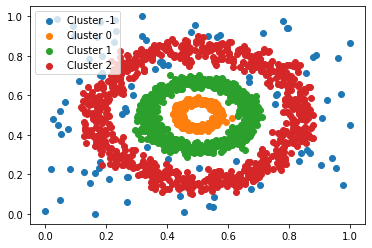

In [35]:
for i in [-1,  0,  1,  2]:
  plt.scatter(scaled[y_pred == i, 0], scaled[y_pred == i, 1], label = "Cluster {}".format(i))

plt.legend()